In [27]:
#!pip install scikit-learn==0.23.1
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scikit-learn
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [28]:
import  pandas as pd
import pylab as pl
import  numpy as np 
%matplotlib inline

In [29]:
churn_one =pd.read_csv("Churn.csv")
print(churn_one)

     tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0      11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1      33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2      23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3      38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4       7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   
..      ...   ...      ...     ...  ...     ...    ...       ...       ...   
195    55.0  44.0     24.0    83.0  1.0    23.0    0.0       1.0       0.0   
196    34.0  23.0      3.0    24.0  1.0     7.0    0.0       1.0       0.0   
197     6.0  32.0     10.0    47.0  1.0    10.0    0.0       1.0       0.0   
198    24.0  30.0      0.0    25.0  4.0     5.0    0.0       1.0       1.0   
199    61.0  50.0     16.0   190.0  2.0    22.0    1.0       1.0       1.0   

     longmon  ...  pager  internet  callwait  confer  ebill  lo

In [30]:
X = np.asarray(churn_one[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [31]:
Y= np.asarray(churn_one[['churn']])
Y[0:5]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [32]:
# here we are normalizing our values 
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160, 1)
Test set: (40, 7) (40, 1)


In [34]:
# here I prefered logesticRegression from the models since it will be suitable for  predicting the churn either to be 1 or 0
# logestic regerssion uses the Sigmoid  function for  predicting either it is to high which will have churn value of 1 or either it is small which will value of 0
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# in logestic regerssion c used  for regularization for some under and over fit dates.c is inversely realeted with   the regularization.
#I used liblinear optimaization  since I have small data set.
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train.ravel())

In [35]:
new_predict = LR.predict(X_test)
new_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0.])

In [36]:
# this will  give the probablity of the users probablity to contniue which the second column or it will remain the first column the first value is for zero churn and the second one is for one churn
new_predict_prob = LR.predict_proba(X_test)
new_predict_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

In [37]:
#  we will use Jaccard_score and log_loss evaluations.
from sklearn.metrics import jaccard_score
jaccard_score(y_test, new_predict,pos_label=0)

np.float64(0.7058823529411765)

In [38]:
from sklearn.metrics import log_loss
log_loss(y_test, new_predict_prob)

0.6017092478101185

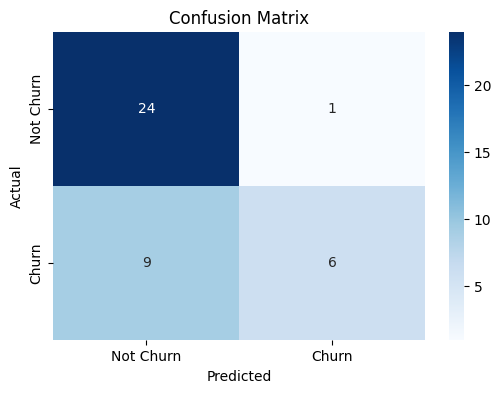

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression with regularization and solver for small datasets
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train.ravel())

# Predicting on the test set
y_pred = LR.predict(X_test)

# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))  # Adjust the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
